- Neuron
  - a linear tranformation of the input (multiplying the input by the weight and adding a bias) followed by the application of a fixed nonlinear function (activation function)

- Activation Function
  - allows the output function to have different slopes at different values (something a linear function cannot do) allowing for approximation of arbitrary functions
  - at the last layer of the network, it has the role of concentrating the outputs of the preceding linear operation into the given range
  - are nonlinear. Repeated applications of (w*x + b) without an activation function results in a function of the same form. The nonlinearity allows the overall network to approximate more complex functions
  - are differentiable, so the gradients can be computer through them. 

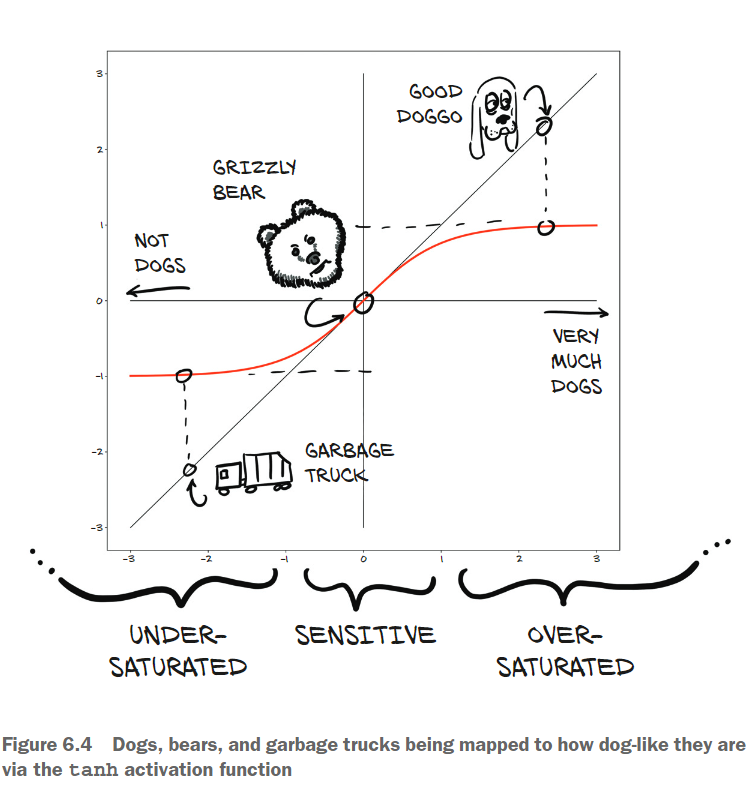

In [19]:
from PIL import Image
img = Image.open(f"./Activation Function.PNG")
img

In [20]:
import torch.nn as nn
import torch.optim as optim
import torch

In [21]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)  
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [22]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([10,  2,  7,  6,  3,  8,  4,  1,  9]), tensor([5, 0]))

In [23]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [24]:
# input size, output size, and bias is defaulted to True
linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[4.4779],
        [3.3351]], grad_fn=<AddmmBackward0>)

In [25]:
linear_model.weight

Parameter containing:
tensor([[0.8658]], requires_grad=True)

In [26]:
linear_model.bias

Parameter containing:
tensor([0.2442], requires_grad=True)

In [27]:
x = torch.ones(1)
linear_model(x)

tensor([1.1100], grad_fn=<AddBackward0>)

In [28]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100],
        [1.1100]], grad_fn=<AddmmBackward0>)

- Batches
  - By providing batches of inputs, the calculation can be spread across the otherwise-idle units, which means the batched results come back just as quickly as a single result would
  - Advanced models use statistical information from the entire batch, and those statistics get better with larger batch sizes

In [29]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(),
					  lr= 1e-1)

In [30]:
linear_model.parameters()

<generator object Module.parameters at 0x000001ECB3384BA0>

In [31]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.7170]], requires_grad=True),
 Parameter containing:
 tensor([-0.9967], requires_grad=True)]

In [32]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
	for epoch in range(1, n_epochs + 1):
		t_p_train = model(t_u_train)
		loss_train = loss_fn(t_p_train, t_c_train)
		
		t_p_val = model(t_u_val)
		loss_val = loss_fn(t_p_val, t_c_val)
		
		optimizer.zero_grad()
		loss_train.backward()
		optimizer.step()

		if epoch == 1 or epoch % 1000 == 0:
			print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}," f" Validation loss {loss_val.item():.4f}")

In [33]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(n_epochs = 3000, 
				optimizer = optimizer, 
				model = linear_model, 
				loss_fn = nn.MSELoss(),
				t_u_train = t_un_train, 
				t_u_val = t_un_val, 
				t_c_train = t_c_train, 
				t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 283.1664, Validation loss 47.3060
Epoch 1000, Training loss 4.0525, Validation loss 6.3408
Epoch 2000, Training loss 3.1995, Validation loss 3.0213
Epoch 3000, Training loss 3.1718, Validation loss 2.5551

Parameter containing:
tensor([[5.2337]], requires_grad=True)
Parameter containing:
tensor([-16.3176], requires_grad=True)


In [34]:
seq_model = nn.Sequential(nn.Linear(1,13),
						  nn.Tanh(),
						  nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [35]:
for name, param in seq_model.named_parameters():
	print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [36]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(1,8)),
									   ('hidden_activation', nn.Tanh()),
									   ('output_linear', nn.Linear(8,1))]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [37]:
for name, param in seq_model.named_parameters():
	print(name, param.shape)	

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [38]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1036], requires_grad=True)

In [39]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
	n_epochs = 5000,
	optimizer = optimizer,
	model = seq_model,
	loss_fn = nn.MSELoss(),
	t_u_train = t_un_train,
	t_u_val = t_un_val,
	t_c_train = t_c_train,
	t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
# Monitor gradients of the weight of the hidden linear layer
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 223.8075, Validation loss 32.9715
Epoch 1000, Training loss 6.5705, Validation loss 0.9650
Epoch 2000, Training loss 6.7401, Validation loss 2.1673
Epoch 3000, Training loss 2.9884, Validation loss 0.8938
Epoch 4000, Training loss 2.3446, Validation loss 1.1315
Epoch 5000, Training loss 2.2132, Validation loss 1.5291
output tensor([[7.5505],
        [1.9959]], grad_fn=<AddmmBackward0>)
answer tensor([[8.0000],
        [0.5000]])
hidden tensor([[ -1.1712],
        [ -0.0987],
        [ -0.0389],
        [ 18.3903],
        [  0.0267],
        [-13.3684],
        [-16.8923],
        [ -0.8645]])


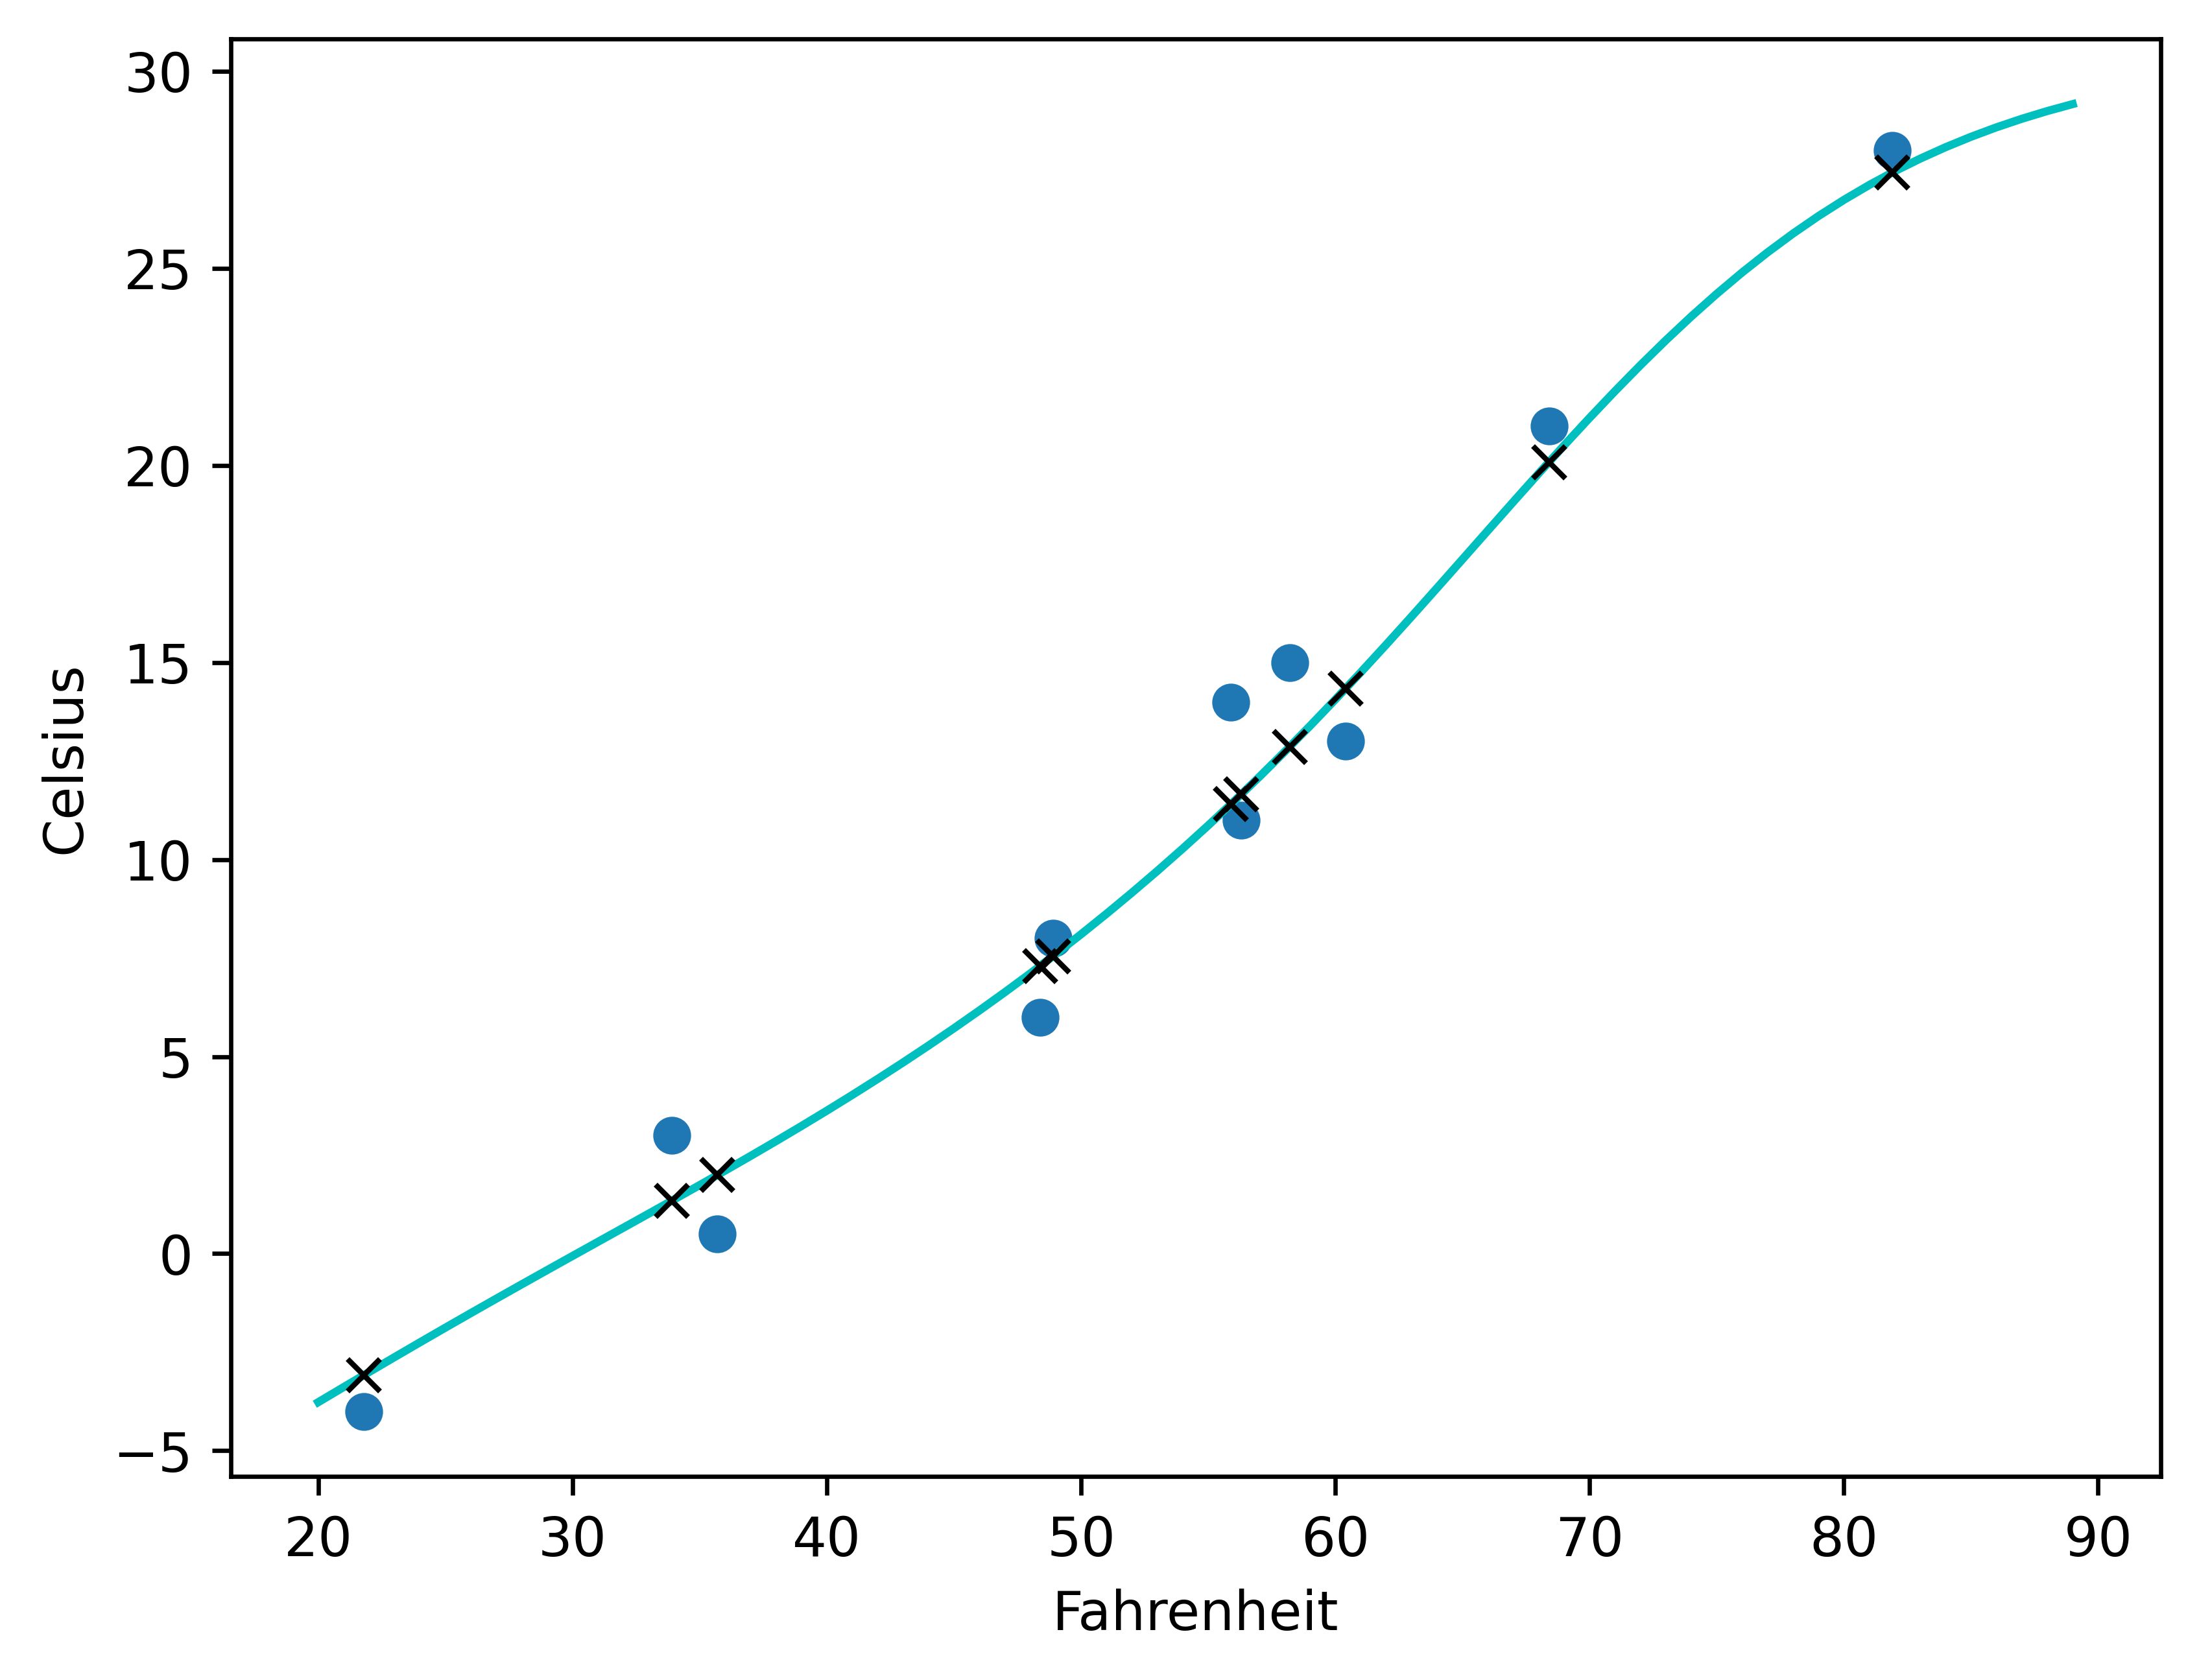

In [40]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')